In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('benchmark.csv')
df.fillna('op', inplace=True)
df

,cores,operation,part,elapsedRealTime
0,1,download,raw,373.42
1,1,download,mzid,12.72
2,1,download,mzml,134.61
3,1,convertraw,op,338.39
4,1,extract,op,11.44
5,1,mz2parquet,op,3655.95
6,1,mgf2parquet,op,89.83
7,2,download,raw,398.47
8,2,download,mzid,11.62
9,2,download,mzml,94.53


In [27]:
cmp_results = df.groupby(['operation', 'cores'])\
.sum()\
.reset_index()\
.groupby(['operation'])\
.apply(lambda d: d.set_index('cores').elapsedRealTime)
cmp_results

cores,1,2,4,8
operation,,,,
convertraw,338.39,196.36,144.67,103.44
download,520.75,504.62,587.23,459.68
extract,11.44,12.46,11.30,8.99
mgf2parquet,89.83,51.86,33.61,28.94
mz2parquet,3655.95,2335.63,1532.11,1544.34


In [43]:
def plot_benchmark(
    cmp_results: pd.DataFrame,
    title: str = 'test',
    bars = None, 
    labels = None,
    bar_labels = None,
    colours = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red'],
    bar_width = 0.2,
    opacity = 1.0,
    error_config = {'ecolor': 'black'},
    ax = None,
):
    if labels is None:
        labels = cmp_results.index
        
    if bars is None:
        bars = cmp_results.columns
    
    if bar_labels is None:
        bar_labels = bars
        
    if bar_width * len(bars) > 1.0:
        bar_width = 0.8 / len(bars)
    
    index = np.arange(len(cmp_results))
    if ax is None:
        fig, ax = plt.subplots()
        given_ax = False
    else:
        given_ax = True

    for i, bar in enumerate(bars):
        ax.bar(
            index + i*bar_width,
            cmp_results[bar],#['mean'],
            bar_width,
            alpha=opacity,
            color=colours[i], #yerr=cmp_results[bar]['std'],
            error_kw=error_config,
            label=bar_labels[i]
        )

    ax.set_xlabel('Operation')
    ax.set_ylabel('Runtime in Seconds')
    ax.set_yscale('log')
    #ax.ticklabel_format(style='plain')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()

    if not given_ax:
        fig.tight_layout()
        plt.show()

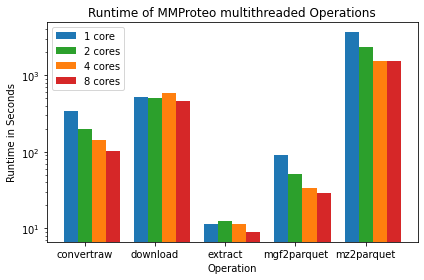

In [47]:
fig, ax = plt.subplots()

plot_benchmark(
    cmp_results,
    bar_labels = [f"{core} core{'s' if int(core) > 1 else ''}" for core in cmp_results.columns],
    title="Runtime of MMProteo multithreaded Operations",
    ax=ax,
)

fig.tight_layout()

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('mmproteo_multithreading_benchmark.pdf')
plt.savefig('mmproteo_multithreading_benchmark.png')
plt.savefig('mmproteo_multithreading_benchmark.svg')

plt.show()